In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("datasets/youtube_cleaned.csv")
reddit_df = pd.read_csv("datasets/reddit_cleaned.csv")
youtube_df = pd.read_csv("datasets/youtube_cleaned.csv")


In [23]:
youtube_df.sort_values(by='year').head()

,id,parent_id,text,author,views,likes,datetime,event,year,date,clean_text,month
25102,gHPke43iqNg,NaN,Spain v Russia | 2018 FIFA World Cup | Match H...,UCpcTrCXblq78GZrTUTLWeBw,25358188.0,189312.0,2018-07-01 17:36:18,World Cup,2018,2018-07-01,spain russia fifa world cup match highlight,2018-07
48898,Ugwa-5_rguvGjnILhqN4AaABAg,5afmFgfdFzA,"An English saying soccer, 🤐",@aderinolamiju,NaN,0.0,2019-04-20 14:04:11,World Cup,2018,2019-04-20,english saying soccer,2019-04
48897,5afmFgfdFzA,NaN,How a Bribe-Taking Informant Changed the World...,UCUMZ7gohGI9HcU9VNsr2FJQ,143331.0,1251.0,2018-07-05 14:50:11,World Cup,2018,2018-07-05,bribetaking informant changed world cup,2018-07
48896,UgwrxXgLnd4oOcgTAtJ4AaABAg,CkKloyBQraE,AUSTRALIANS😂😂,@Dramashere-i9z,NaN,0.0,2024-10-30 15:31:18,World Cup,2018,2024-10-30,australian,2024-10
48895,UgwgLyEpYbO9zOzsMON4AaABAg,CkKloyBQraE,Two sides of coin,@techworld1404,NaN,0.0,2024-11-02 17:22:20,World Cup,2018,2024-11-02,two side coin,2024-11


In [4]:

unique_count = reddit_df['author'].nunique()
author_row_count = reddit_df['author'].count()
nan_count = reddit_df['author'].isna().sum()
print("Number of unique authors:", unique_count)
print("Number of total entries:", author_row_count)
print("Number of NaN values in 'author' column:", nan_count)

Number of unique authors: 49597
Number of total entries: 85463
Number of NaN values in 'author' column: 14184


In [5]:

unique_count = df['author'].nunique()
author_row_count = df['author'].count()
nan_count = df['author'].isna().sum()
print("Number of unique authors:", unique_count)
print("Number of total entries:", author_row_count)
print("Number of NaN values in 'author' column:", nan_count)

Number of unique authors: 79970
Number of total entries: 98760
Number of NaN values in 'author' column: 30


In [6]:
# Combine dfs
combined_df = pd.concat([reddit_df, youtube_df], ignore_index=True)

# Calculate total and unique authors for Olympics and World Cup
total_authors_by_event = combined_df.groupby('event')['author'].count()
unique_authors_by_event = combined_df.groupby('event')['author'].nunique()

# Combine into one DataFrame
authors_summary_df = pd.DataFrame({
    'Total Authors': total_authors_by_event,
    'Unique Authors': unique_authors_by_event
})

# Calculate and round percentage of unique authors
authors_summary_df['% Unique'] = (authors_summary_df['Unique Authors'] / authors_summary_df['Total Authors']) * 100
authors_summary_df['% Unique'] = authors_summary_df['% Unique'].round(2)

# Print the result
print(authors_summary_df)


           Total Authors  Unique Authors  % Unique
event                                             
Olympics           93580           67950     72.61
World Cup          90643           63004     69.51


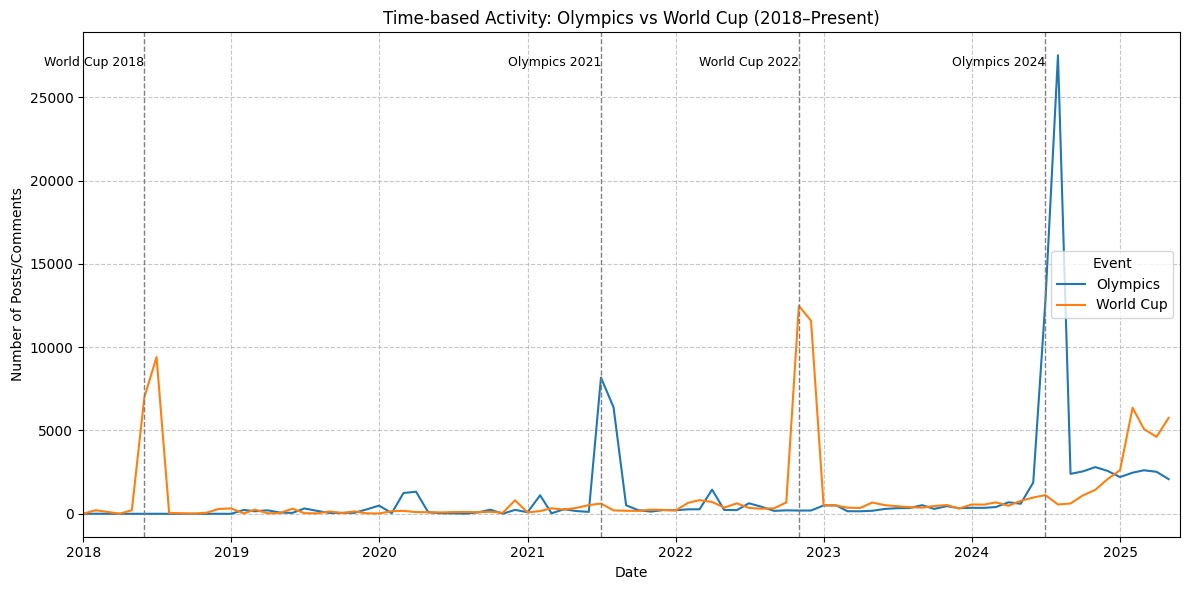

Olympics total: 98271
World Cup total: 94077


In [7]:
# Convert 'date' to datetime and create 'month'
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')
combined_df['month'] = combined_df['date'].dt.to_period('M')


filtered_df = combined_df.copy()

# Group by month and event
time_activity = filtered_df.groupby(['month', 'event']).size().unstack(fill_value=0)
time_activity.index = time_activity.index.to_timestamp()
time_activity = time_activity[(time_activity.index >= '2018-01-01')]

# Plot actual post/comment counts
plt.figure(figsize=(12, 6))
for event in time_activity.columns:
    plt.plot(time_activity.index, time_activity[event], label=event)

# Add vertical event lines + horizontal labels
event_dates = {
    'World Cup 2018': '2018-06',
    'Olympics 2021': '2021-07',
    'World Cup 2022': '2022-11',
    'Olympics 2024': '2024-07'
}

for label, date in event_dates.items():
    x = pd.to_datetime(date)
    plt.axvline(x, color='gray', linestyle='--', linewidth=1)
    plt.text(x, plt.ylim()[1]*0.95, label, rotation=0, verticalalignment='top', horizontalalignment='right', fontsize=9)

plt.title('Time-based Activity: Olympics vs World Cup (2018–Present)')
plt.xlabel('Date')
plt.ylabel('Number of Posts/Comments')
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp.today())
plt.legend(title='Event')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Olympics total:", time_activity['Olympics'].sum())
print("World Cup total:", time_activity['World Cup'].sum())


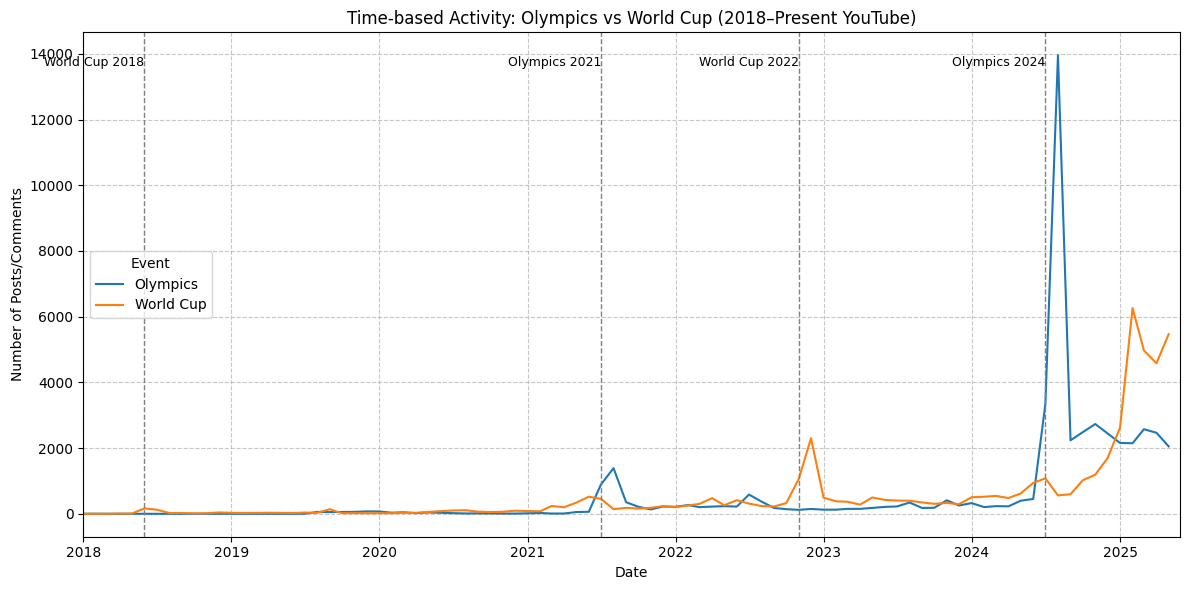

Olympics total: 49843
World Cup total: 48894


In [25]:
# Convert 'date' to datetime and create 'month'
youtube_df['date'] = pd.to_datetime(youtube_df['date'], errors='coerce')
youtube_df['month'] = youtube_df['date'].dt.to_period('M')


filtered_df = youtube_df.copy()

# Group by month and event
time_activity = filtered_df.groupby(['month', 'event']).size().unstack(fill_value=0)
time_activity.index = time_activity.index.to_timestamp()
time_activity = time_activity[(time_activity.index >= '2018-01-01')]

# Plot actual post/comment counts
plt.figure(figsize=(12, 6))
for event in time_activity.columns:
    plt.plot(time_activity.index, time_activity[event], label=event)

# Add vertical event lines + horizontal labels
event_dates = {
    'World Cup 2018': '2018-06',
    'Olympics 2021': '2021-07',
    'World Cup 2022': '2022-11',
    'Olympics 2024': '2024-07'
}

for label, date in event_dates.items():
    x = pd.to_datetime(date)
    plt.axvline(x, color='gray', linestyle='--', linewidth=1)
    plt.text(x, plt.ylim()[1]*0.95, label, rotation=0, verticalalignment='top', horizontalalignment='right', fontsize=9)

plt.title('Time-based Activity: Olympics vs World Cup (2018–Present YouTube)')
plt.xlabel('Date')
plt.ylabel('Number of Posts/Comments')
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp.today())
plt.legend(title='Event')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Olympics total:", time_activity['Olympics'].sum())
print("World Cup total:", time_activity['World Cup'].sum())

In [22]:
youtube_df[(youtube_df['event'] == 'World Cup') & (youtube_df['year'] == 2018)]['date'].dt.year.value_counts().sort_index()

date
2010       1
2014       3
2017       4
2018     427
2019     429
2020     717
2021    2803
2022    5953
2023    4103
2024    5206
2025    4156
Name: count, dtype: int64

In [20]:
print(youtube_df[youtube_df['year'] == 2018]['event'].value_counts())
youtube_df[youtube_df['year'] == 2018]['date'].isna().sum()
# Ensure 'date' is parsed as datetime
youtube_df['date'] = pd.to_datetime(youtube_df['date'], errors='coerce')

# Filter for 2018 World Cup posts
wc_2018_df = youtube_df[(youtube_df['event'] == 'World Cup') & (youtube_df['year'] == 2018)]

# Drop NaT dates just in case
wc_2018_df = wc_2018_df.dropna(subset=['date'])

# Get the date range and number of posts
date_min = wc_2018_df['date'].min()
date_max = wc_2018_df['date'].max()
post_count = wc_2018_df.shape[0]

date_min, date_max, post_count

wc_2018_df['date'].dt.year.value_counts().sort_index()

wc_2018_df.head()

event
World Cup    23802
Name: count, dtype: int64


,id,parent_id,text,author,views,likes,datetime,event,year,date,clean_text,month
25102,gHPke43iqNg,NaN,Spain v Russia | 2018 FIFA World Cup | Match H...,UCpcTrCXblq78GZrTUTLWeBw,25358188.0,189312.0,2018-07-01 17:36:18,World Cup,2018,2018-07-01,spain russia fifa world cup match highlight,2018-07
25103,UgyuDz5DEAFtKHxyLw54AaABAg,gHPke43iqNg,Spain losing again tragically for the second t...,@personenkenzahl,NaN,0.0,2025-05-04 18:02:52,World Cup,2018,2025-05-04,spain losing tragically second time shocker se...,2025-05
25104,UgyuDz5DEAFtKHxyLw54AaABAg,UgyuDz5DEAFtKHxyLw54AaABAg,injuries and most of 2010 squad retired,@XavierLopez-wl9wd,NaN,0.0,2025-05-09 22:25:34,World Cup,2018,2025-05-09,injury squad retired,2025-05
25105,UgwqKT7OxYGBnGbYR_J4AaABAg,gHPke43iqNg,"Да детко,это матушка)))😍",@stanislavahugo,NaN,0.0,2025-04-29 05:59:57,World Cup,2018,2025-04-29,NaN,2025-04
25106,UgxB-2X-2XYnm3rPoJd4AaABAg,gHPke43iqNg,What a commentry🔥🔥\nPoetry + Words = Sounds mo...,@facts5552,NaN,0.0,2025-04-28 08:12:46,World Cup,2018,2025-04-28,commentry poetry word sound song love english ...,2025-04


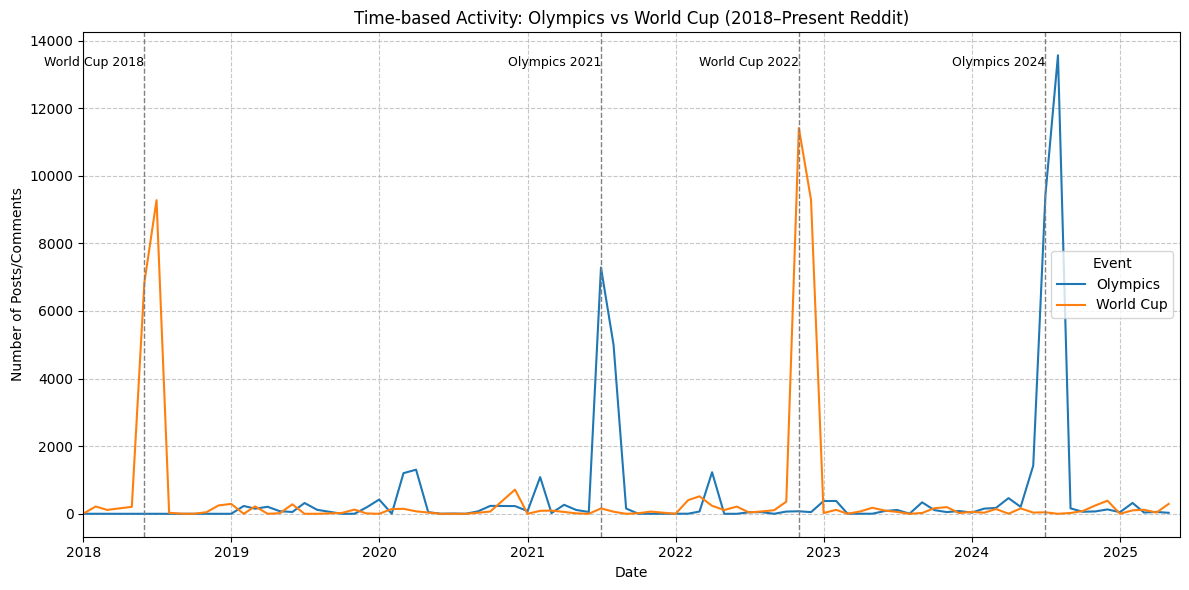

Olympics total: 48428
World Cup total: 45183


In [10]:
# Convert 'date' to datetime and create 'month'
reddit_df['date'] = pd.to_datetime(reddit_df['date'], errors='coerce')
reddit_df['month'] = reddit_df['date'].dt.to_period('M')


filtered_df = reddit_df.copy()

# Group by month and event
time_activity = filtered_df.groupby(['month', 'event']).size().unstack(fill_value=0)
time_activity.index = time_activity.index.to_timestamp()
time_activity = time_activity[(time_activity.index >= '2018-01-01')]

# Plot actual post/comment counts
plt.figure(figsize=(12, 6))
for event in time_activity.columns:
    plt.plot(time_activity.index, time_activity[event], label=event)

# Add vertical event lines + horizontal labels
event_dates = {
    'World Cup 2018': '2018-06',
    'Olympics 2021': '2021-07',
    'World Cup 2022': '2022-11',
    'Olympics 2024': '2024-07'
}

for label, date in event_dates.items():
    x = pd.to_datetime(date)
    plt.axvline(x, color='gray', linestyle='--', linewidth=1)
    plt.text(x, plt.ylim()[1]*0.95, label, rotation=0, verticalalignment='top', horizontalalignment='right', fontsize=9)

plt.title('Time-based Activity: Olympics vs World Cup (2018–Present Reddit)')
plt.xlabel('Date')
plt.ylabel('Number of Posts/Comments')
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp.today())
plt.legend(title='Event')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Olympics total:", time_activity['Olympics'].sum())
print("World Cup total:", time_activity['World Cup'].sum())